In [1]:
from utils import profile_predict, plot_profile, calculate_metrics
from RNN.models import EncoderDecoderGRU

In [6]:
curve_dir = {}
curve_dir[1] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/preprocessed_small_20/149/1/1_4_0_0.csv"
)
curve_dir[2] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/preprocessed_small_20/149/2/2_4_0_0.csv"
)
curve_dir[3] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/preprocessed_small_20/149/3/3_4_0_0.csv"
)
curve_dir[4] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/preprocessed_small_20/149/4/4_4_0_0.csv"
)
curve_dir[5] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/preprocessed_small_20/149/5/5_4_0_0.csv"
)
curve_dir[6] = (
    "/home/mazin/Projects/Thesis/Data/battery_model_paper/preprocessed_small_20/149/6/6_4_0_0.csv"
)
pretrained_weights = "/home/mazin/Projects/Thesis/RNN/outputs/silvery-field-185/SEFD-monitor_val-epoch=503-train_loss=0.0000711-val_loss=0.0002140-val_mae=0.01493.ckpt"

In [7]:
rnn_model = EncoderDecoderGRU.load_from_checkpoint(pretrained_weights).to("cpu")

In [9]:
actual_current, actual_voltage, predicted_voltage = profile_predict(
    rnn_model, curve_dir[6]
)

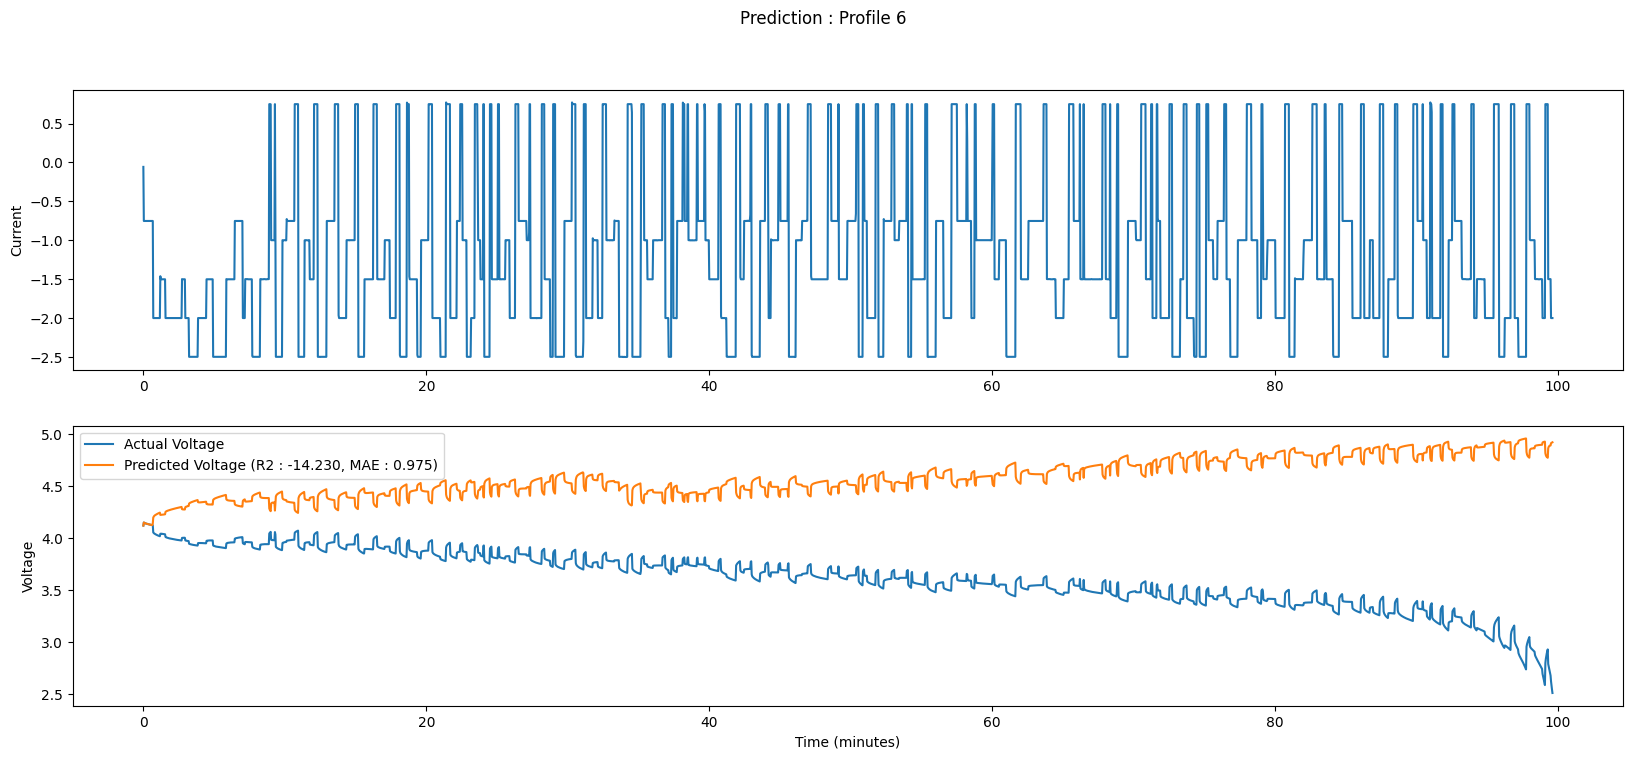

In [13]:
plot_profile(
    actual_current, actual_voltage, predicted_voltage, title="Prediction : Profile 6"
)